<a href="https://colab.research.google.com/github/Prani897/sleep-health-lifestyle-eda/blob/main/Sleep_Health_EDA_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Health and Lifestyle - Exploratory Data Analysis

**Student:** Nikunj  
**Course:** CS696A - Full-Stack Enterprise Application Development  
**Group:** Group 3  
**Date:** December 2024  

---

## Project Overview
This notebook analyzes the Sleep Health and Lifestyle dataset to understand factors affecting sleep quality and identify patterns in sleep disorders, lifestyle habits, and health metrics.

### Dataset Information:
- **Source:** Kaggle - Sleep Health and Lifestyle Dataset
- **Size:** 374 records, 13 features
- **Topic:** Sleep patterns, lifestyle factors, and health metrics

---
## Step 1: Mount Google Drive
First, we need to connect to Google Drive to access our dataset

In [11]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## Step 2: Navigate to Project Directory
Change to the folder where our dataset is stored

In [12]:
# Navigate to project folder
import os
os.chdir('/content/drive/MyDrive')

# Check current directory
print("Current directory:", os.getcwd())

# List files to verify
print("\nFiles in directory:")
!ls -la

Current directory: /content/drive/MyDrive

Files in directory:
total 314
drwx------ 2 root root   4096 Sep 12 22:43 'Colab Notebooks'
-rw------- 1 root root 124595 Mar  5  2025 'Pranali D Dukhande Resume.pdf'
-rw------- 1 root root  83177 Oct 28  2022 'Share PRANALI RESUME NEW-1.pdf'
-rw------- 1 root root  84079 Oct  7  2022 'Share PRANALI RESUME NEW.pdf'
-rw------- 1 root root  24137 Nov 30 22:32  Sleep_health_and_lifestyle_dataset.csv


---
## Step 3: Install Required Libraries
Installing all the Python packages we need for analysis

In [13]:
# Install necessary packages
!pip install pandas numpy matplotlib seaborn scikit-learn -q

print("All packages installed successfully!")

All packages installed successfully!


---
## Step 4: Import Libraries
Importing all the libraries we'll use for data analysis and visualization

In [14]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


---
## Step 5: Load Dataset
Reading the CSV file into a pandas DataFrame

In [15]:
# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Show first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Number of rows: 374
Number of columns: 13

First 5 rows of the dataset:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


---
## Step 6: Initial Data Exploration
Let's examine the structure and basic statistics of our data

In [16]:
# Display column names and data types
print("Dataset Information:")
print("=" * 60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [17]:
# Check for missing values
print("\nMissing Values:")
print("=" * 60)
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\nNo missing values found!")


Missing Values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [18]:
# Display statistical summary for numerical columns
print("\nStatistical Summary:")
print("=" * 60)
df.describe()


Statistical Summary:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [19]:
# Check unique values in categorical columns
print("\nCategorical Variables:")
print("=" * 60)

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print("-" * 40)


Categorical Variables:

Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64
----------------------------------------

Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
----------------------------------------

BMI Category:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
----------------------------------------

Sleep Disorder:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64
----------------------------------------


---
## Step 7: Data Cleaning
Cleaning the data by handling missing values and preparing for analysis

In [20]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

print("Starting Data Cleaning...")
print("=" * 60)

# Fill missing values in Sleep Duration with median
if 'Sleep Duration' in df_clean.columns:
    median_sleep = df_clean['Sleep Duration'].median()
    df_clean['Sleep Duration'].fillna(median_sleep, inplace=True)
    print("Filled missing Sleep Duration values with median")

# Fill missing Sleep Disorder values with 'None'
if 'Sleep Disorder' in df_clean.columns:
    df_clean['Sleep Disorder'].fillna('None', inplace=True)
    print("Filled missing Sleep Disorder values with 'None'")

# Remove duplicate rows if any
duplicates = df_clean.duplicated().sum()
df_clean.drop_duplicates(inplace=True)
print(f"Removed {duplicates} duplicate rows")

print(f"\nCleaning complete! Final shape: {df_clean.shape}")

Starting Data Cleaning...
Filled missing Sleep Duration values with median
Filled missing Sleep Disorder values with 'None'
Removed 0 duplicate rows

Cleaning complete! Final shape: (374, 13)


---
## Step 8: Feature Engineering
Creating new features from existing data to make analysis easier

In [21]:
# Create a copy for feature engineering
df_enhanced = df_clean.copy()

print("Creating New Features...")
print("=" * 60)

# Split Blood Pressure into Systolic and Diastolic
if 'Blood Pressure' in df_enhanced.columns:
    bp_split = df_enhanced['Blood Pressure'].str.split('/', expand=True)
    df_enhanced['Systolic_BP'] = pd.to_numeric(bp_split[0])
    df_enhanced['Diastolic_BP'] = pd.to_numeric(bp_split[1])
    print("Created: Systolic_BP and Diastolic_BP from Blood Pressure")

# Create Age Groups
if 'Age' in df_enhanced.columns:
    df_enhanced['Age_Group'] = pd.cut(df_enhanced['Age'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['<30', '30-40', '40-50', '50-60', '60+'])
    print("Created: Age_Group (<30, 30-40, 40-50, 50-60, 60+)")

# Create Sleep Quality Categories
if 'Quality of Sleep' in df_enhanced.columns:
    df_enhanced['Sleep_Quality_Category'] = pd.cut(df_enhanced['Quality of Sleep'],
                                                   bins=[0, 4, 6, 8, 10],
                                                   labels=['Poor', 'Fair', 'Good', 'Excellent'])
    print("Created: Sleep_Quality_Category (Poor, Fair, Good, Excellent)")

# Create Stress Level Categories
if 'Stress Level' in df_enhanced.columns:
    df_enhanced['Stress_Category'] = pd.cut(df_enhanced['Stress Level'],
                                           bins=[0, 3, 6, 10],
                                           labels=['Low', 'Medium', 'High'])
    print("Created: Stress_Category (Low, Medium, High)")

# Create Activity Level Categories
if 'Physical Activity Level' in df_enhanced.columns:
    df_enhanced['Activity_Category'] = pd.cut(df_enhanced['Physical Activity Level'],
                                             bins=[0, 30, 60, 90, 150],
                                             labels=['Sedentary', 'Light', 'Moderate', 'Active'])
    print("Created: Activity_Category (Sedentary, Light, Moderate, Active)")

# Create Sleep Disorder Flag
if 'Sleep Disorder' in df_enhanced.columns:
    df_enhanced['Has_Sleep_Disorder'] = (df_enhanced['Sleep Disorder'] != 'None').astype(int)
    print("Created: Has_Sleep_Disorder (0 = No, 1 = Yes)")

# Convert BMI Category to numeric
if 'BMI Category' in df_enhanced.columns:
    bmi_mapping = {'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}
    df_enhanced['BMI_Numeric'] = df_enhanced['BMI Category'].map(bmi_mapping)
    print("Created: BMI_Numeric (Normal=0, Overweight=1, Obese=2)")

print(f"\nFeature engineering complete! New shape: {df_enhanced.shape}")

Creating New Features...
Created: Systolic_BP and Diastolic_BP from Blood Pressure
Created: Age_Group (<30, 30-40, 40-50, 50-60, 60+)
Created: Sleep_Quality_Category (Poor, Fair, Good, Excellent)
Created: Stress_Category (Low, Medium, High)
Created: Activity_Category (Sedentary, Light, Moderate, Active)
Created: Has_Sleep_Disorder (0 = No, 1 = Yes)
Created: BMI_Numeric (Normal=0, Overweight=1, Obese=2)

Feature engineering complete! New shape: (374, 21)


In [22]:
# Display the enhanced dataset
print("\nEnhanced Dataset (first 5 rows):")
df_enhanced.head()


Enhanced Dataset (first 5 rows):


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Age_Group,Sleep_Quality_Category,Stress_Category,Activity_Category,Has_Sleep_Disorder,BMI_Numeric
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,<30,Fair,Medium,Light,0,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,<30,Fair,High,Light,0,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,<30,Fair,High,Light,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,<30,Poor,High,Sedentary,1,2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,<30,Poor,High,Sedentary,1,2


---
## Step 9: Visualization - Distribution Plots
Creating visualizations to understand the distribution of key variables

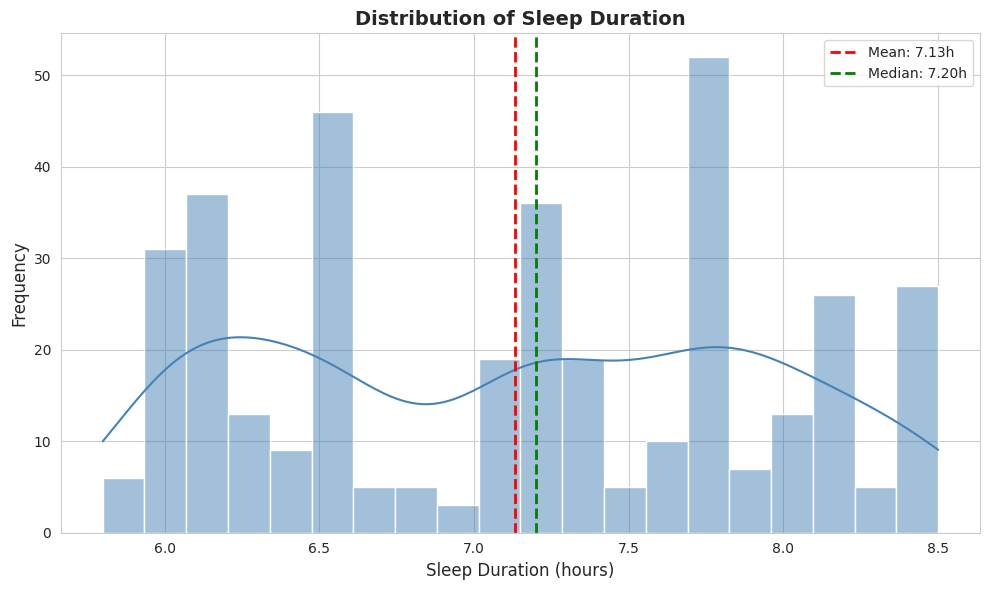

In [23]:
# Plot 1: Sleep Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_enhanced, x='Sleep Duration', bins=20, kde=True, color='steelblue')

# Add mean and median lines
mean_sleep = df_enhanced['Sleep Duration'].mean()
median_sleep = df_enhanced['Sleep Duration'].median()
plt.axvline(mean_sleep, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sleep:.2f}h')
plt.axvline(median_sleep, color='green', linestyle='--', linewidth=2, label=f'Median: {median_sleep:.2f}h')

plt.title('Distribution of Sleep Duration', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

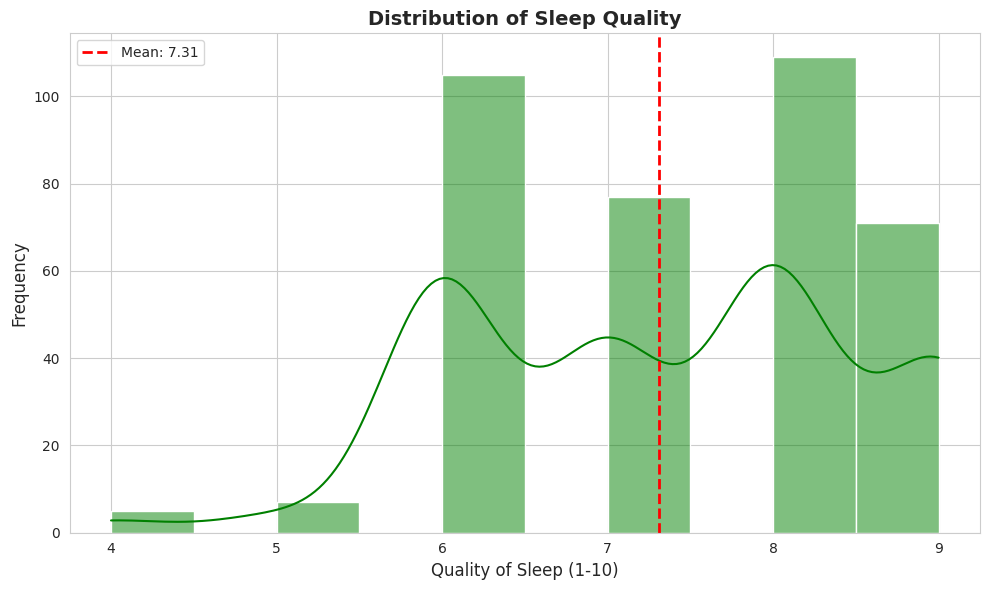

In [24]:
# Plot 2: Quality of Sleep Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_enhanced, x='Quality of Sleep', bins=10, kde=True, color='green')

# Add mean line
mean_quality = df_enhanced['Quality of Sleep'].mean()
plt.axvline(mean_quality, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_quality:.2f}')

plt.title('Distribution of Sleep Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality of Sleep (1-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

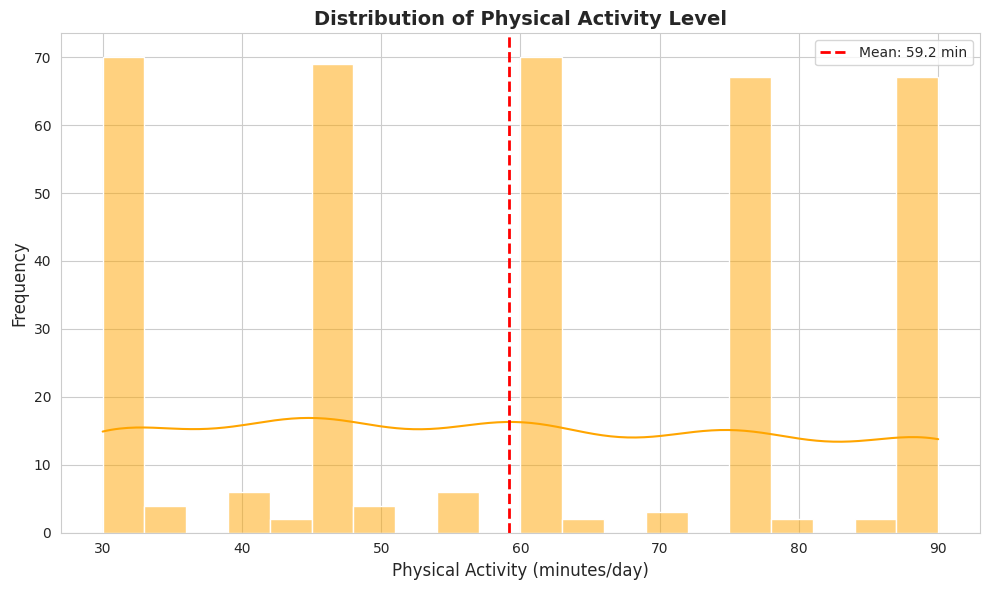

In [25]:
# Plot 3: Physical Activity Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_enhanced, x='Physical Activity Level', bins=20, kde=True, color='orange')

mean_activity = df_enhanced['Physical Activity Level'].mean()
plt.axvline(mean_activity, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_activity:.1f} min')

plt.title('Distribution of Physical Activity Level', fontsize=14, fontweight='bold')
plt.xlabel('Physical Activity (minutes/day)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

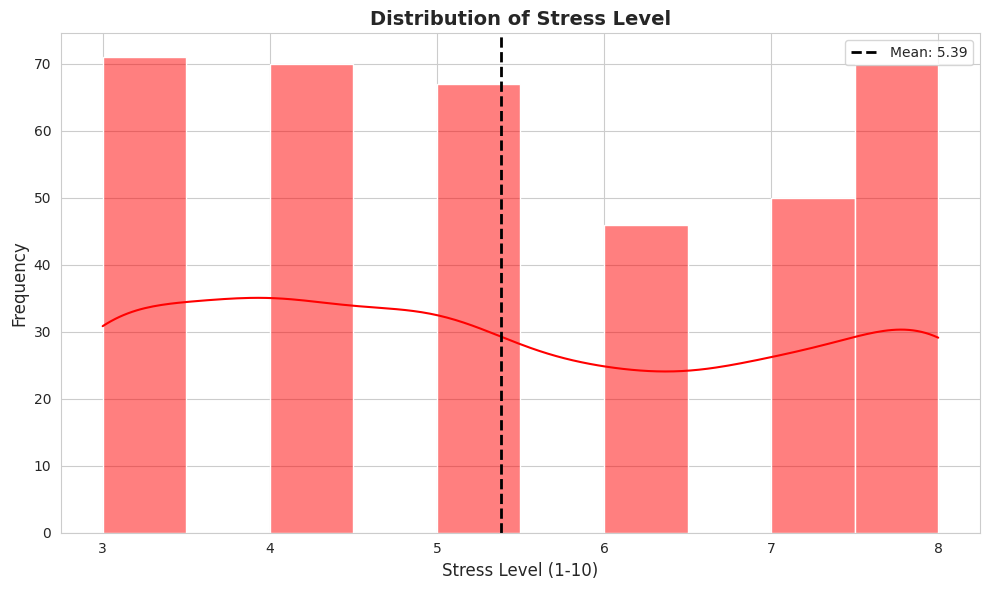

In [26]:
# Plot 4: Stress Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_enhanced, x='Stress Level', bins=10, kde=True, color='red')

mean_stress = df_enhanced['Stress Level'].mean()
plt.axvline(mean_stress, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_stress:.2f}')

plt.title('Distribution of Stress Level', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

---
## Step 10: Visualization - Categorical Variables
Understanding the distribution of categorical features

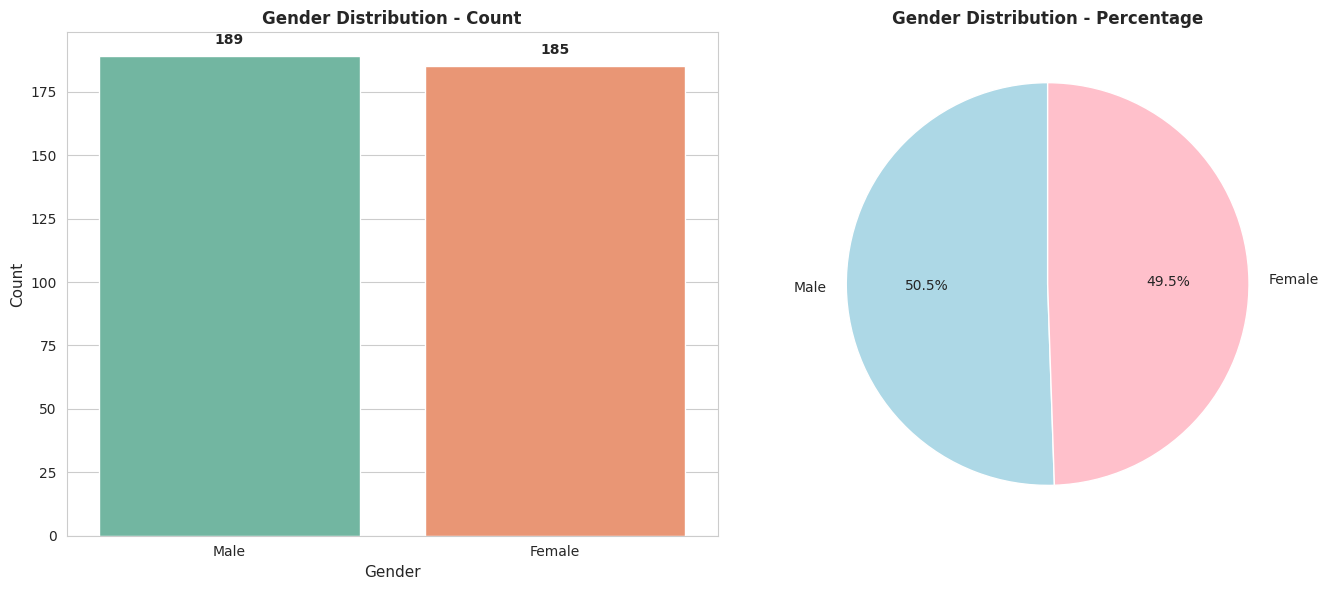

In [27]:
# Plot 5: Gender Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
gender_counts = df_enhanced['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2', ax=ax1)
ax1.set_title('Gender Distribution - Count', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)

# Add value labels on bars
for i, v in enumerate(gender_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightblue', 'pink'], startangle=90)
ax2.set_title('Gender Distribution - Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

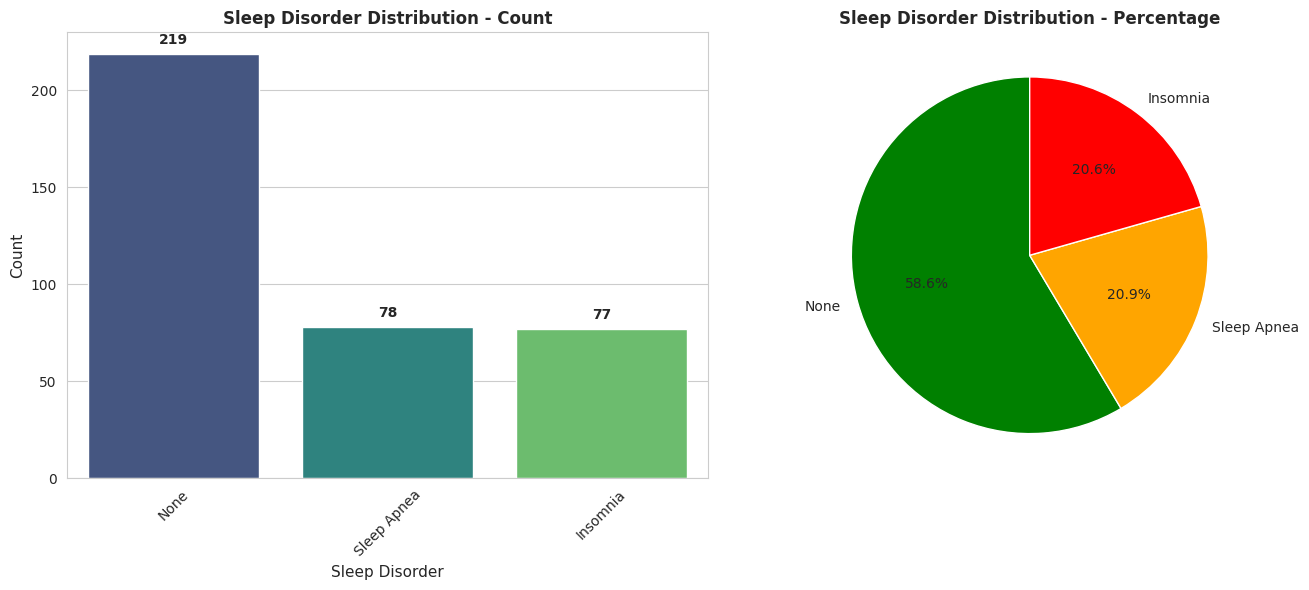

In [28]:
# Plot 6: Sleep Disorder Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
disorder_counts = df_enhanced['Sleep Disorder'].value_counts()
sns.barplot(x=disorder_counts.index, y=disorder_counts.values, palette='viridis', ax=ax1)
ax1.set_title('Sleep Disorder Distribution - Count', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sleep Disorder', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(disorder_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['green', 'orange', 'red']
ax2.pie(disorder_counts.values, labels=disorder_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Sleep Disorder Distribution - Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

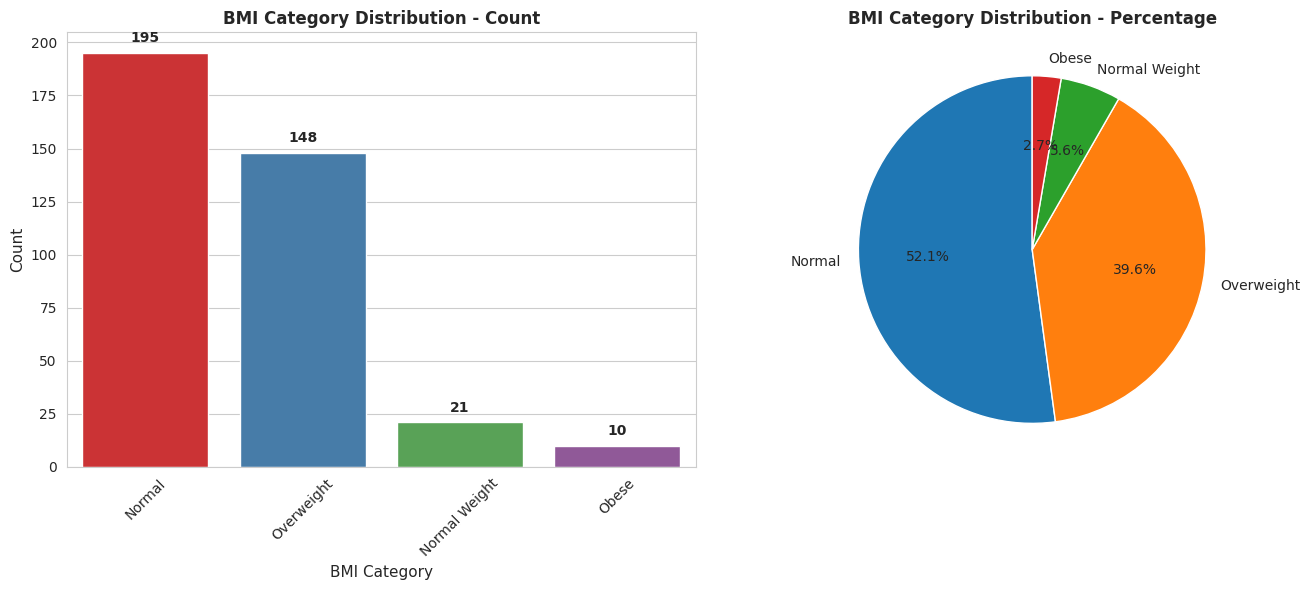

In [29]:
# Plot 7: BMI Category Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
bmi_counts = df_enhanced['BMI Category'].value_counts()
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='Set1', ax=ax1)
ax1.set_title('BMI Category Distribution - Count', fontsize=12, fontweight='bold')
ax1.set_xlabel('BMI Category', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(bmi_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
ax2.pie(bmi_counts.values, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('BMI Category Distribution - Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## Step 11: Visualization - Relationships Between Variables
Exploring how different variables are related to each other

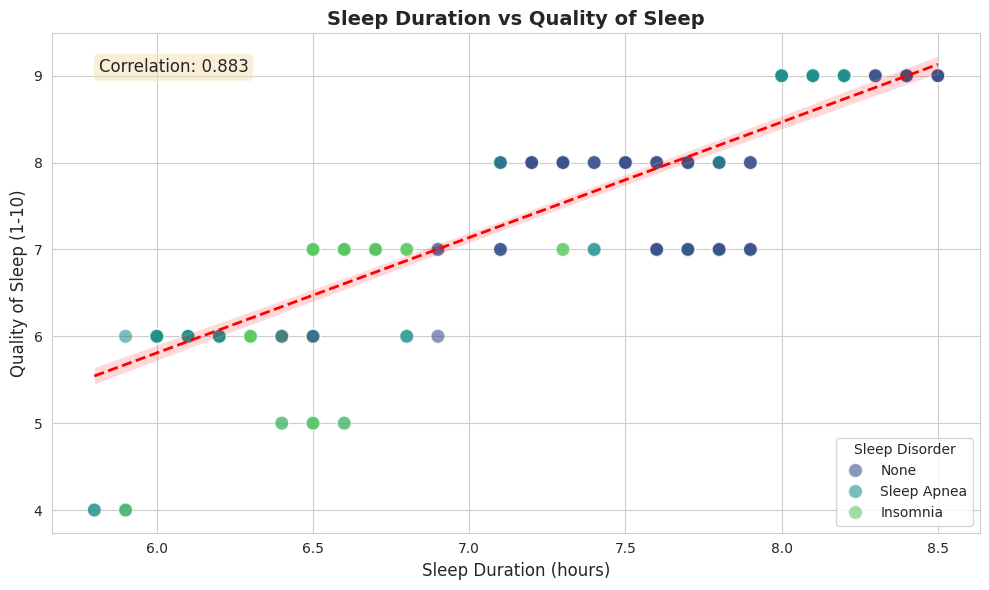

Correlation between Sleep Duration and Quality: 0.883


In [30]:
# Plot 8: Sleep Duration vs Quality of Sleep (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_enhanced, x='Sleep Duration', y='Quality of Sleep',
                hue='Sleep Disorder', palette='viridis', s=100, alpha=0.6)

# Add regression line
sns.regplot(data=df_enhanced, x='Sleep Duration', y='Quality of Sleep',
            scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

# Calculate correlation
correlation = df_enhanced[['Sleep Duration', 'Quality of Sleep']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Sleep Duration vs Quality of Sleep', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Quality of Sleep (1-10)', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Correlation between Sleep Duration and Quality: {correlation:.3f}")

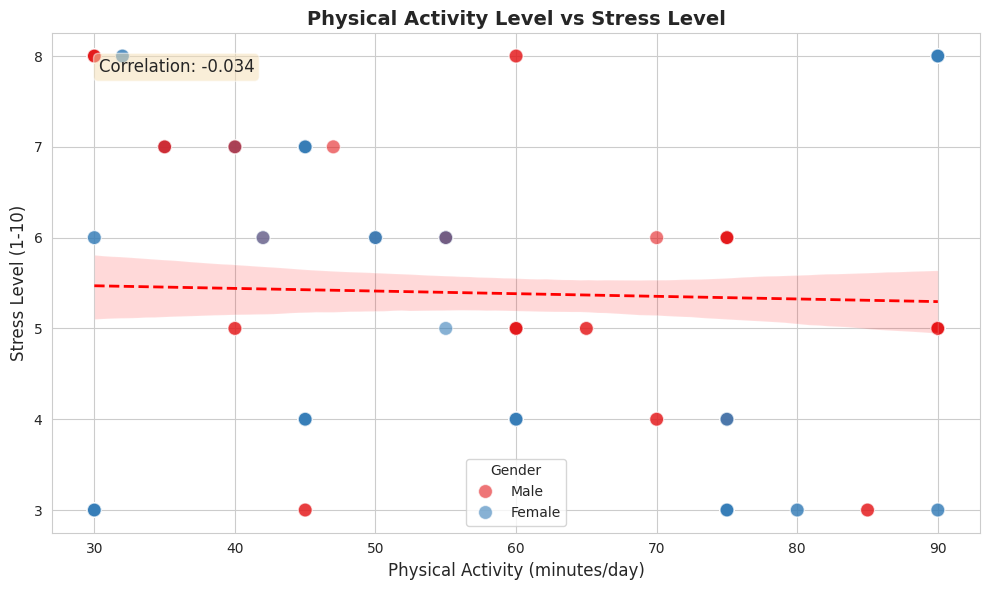

Correlation between Activity and Stress: -0.034


In [31]:
# Plot 9: Physical Activity vs Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_enhanced, x='Physical Activity Level', y='Stress Level',
                hue='Gender', palette='Set1', s=100, alpha=0.6)

# Add regression line
sns.regplot(data=df_enhanced, x='Physical Activity Level', y='Stress Level',
            scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

# Calculate correlation
corr_activity_stress = df_enhanced[['Physical Activity Level', 'Stress Level']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {corr_activity_stress:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Physical Activity Level vs Stress Level', fontsize=14, fontweight='bold')
plt.xlabel('Physical Activity (minutes/day)', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Correlation between Activity and Stress: {corr_activity_stress:.3f}")

---
## Step 12: Visualization - Boxplots for Group Comparisons
Comparing variables across different groups

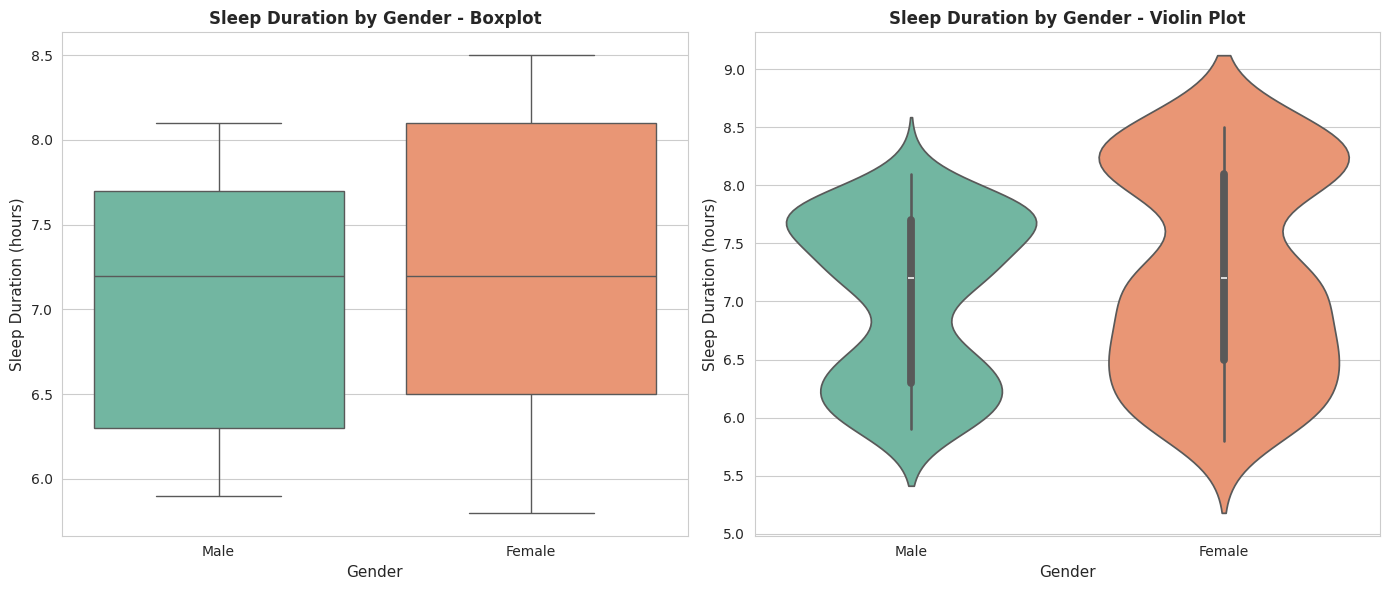


Sleep Duration by Gender:
            mean  median       std
Gender                            
Female  7.229730     7.2  0.879434
Male    7.036508     7.2  0.693197


In [32]:
# Plot 10: Sleep Duration by Gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=df_enhanced, x='Gender', y='Sleep Duration', palette='Set2', ax=ax1)
ax1.set_title('Sleep Duration by Gender - Boxplot', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Sleep Duration (hours)', fontsize=11)

# Violin plot
sns.violinplot(data=df_enhanced, x='Gender', y='Sleep Duration', palette='Set2', ax=ax2)
ax2.set_title('Sleep Duration by Gender - Violin Plot', fontsize=12, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Sleep Duration (hours)', fontsize=11)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSleep Duration by Gender:")
print(df_enhanced.groupby('Gender')['Sleep Duration'].agg(['mean', 'median', 'std']))

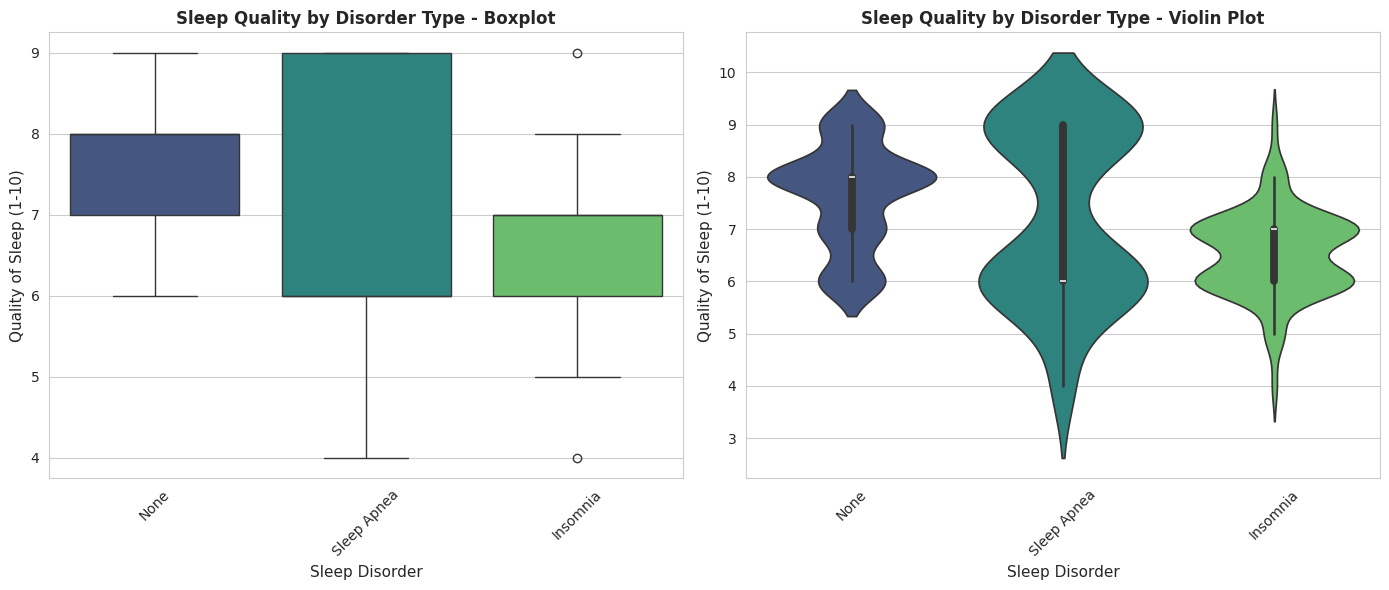


Sleep Quality by Disorder Type:
                    mean  median       std  count
Sleep Disorder                                   
Insomnia        6.532468     7.0  0.804337     77
None            7.625571     8.0  0.975142    219
Sleep Apnea     7.205128     6.0  1.646397     78


In [33]:
# Plot 11: Quality of Sleep by Sleep Disorder
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=df_enhanced, x='Sleep Disorder', y='Quality of Sleep', palette='viridis', ax=ax1)
ax1.set_title('Sleep Quality by Disorder Type - Boxplot', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sleep Disorder', fontsize=11)
ax1.set_ylabel('Quality of Sleep (1-10)', fontsize=11)
ax1.tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=df_enhanced, x='Sleep Disorder', y='Quality of Sleep', palette='viridis', ax=ax2)
ax2.set_title('Sleep Quality by Disorder Type - Violin Plot', fontsize=12, fontweight='bold')
ax2.set_xlabel('Sleep Disorder', fontsize=11)
ax2.set_ylabel('Quality of Sleep (1-10)', fontsize=11)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSleep Quality by Disorder Type:")
print(df_enhanced.groupby('Sleep Disorder')['Quality of Sleep'].agg(['mean', 'median', 'std', 'count']))

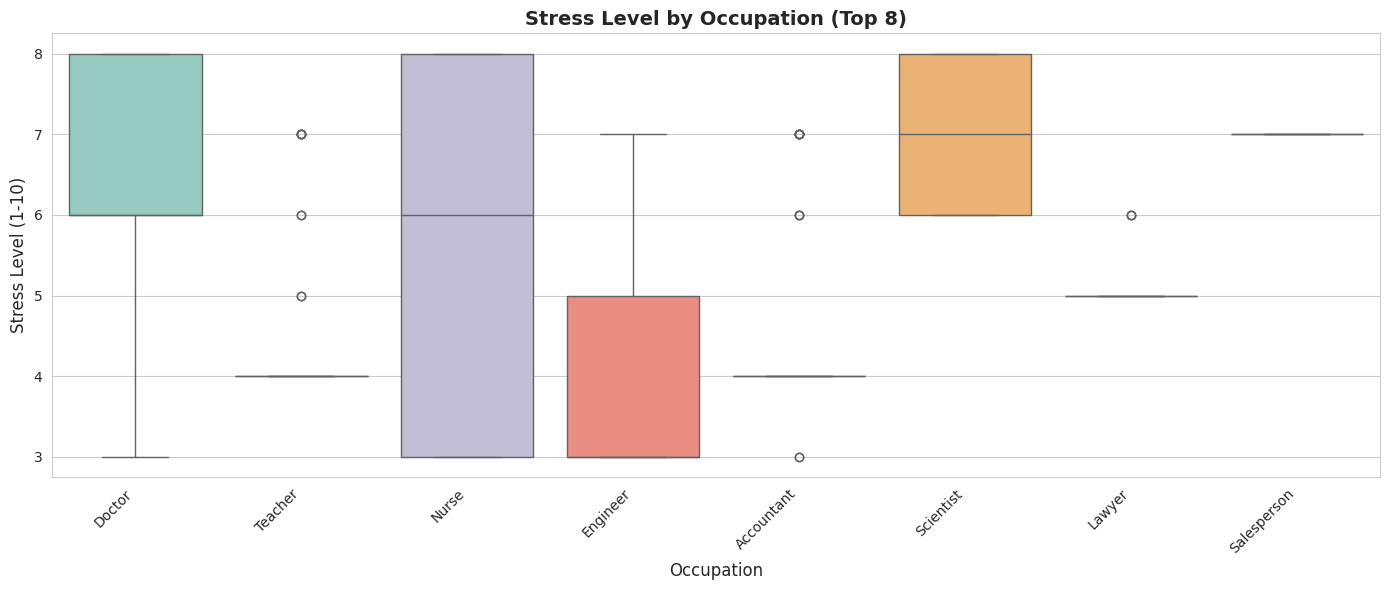


Stress Level by Occupation:
                          mean       std  count
Occupation                                     
Sales Representative  8.000000  0.000000      2
Salesperson           7.000000  0.000000     32
Scientist             7.000000  1.154701      4
Doctor                6.732394  1.372773     71
Software Engineer     6.000000  1.414214      4
Nurse                 5.547945  2.392355     73
Lawyer                5.063830  0.247092     47
Manager               5.000000       NaN      1
Accountant            4.594595  1.235122     37
Teacher               4.525000  1.061868     40
Engineer              3.888889  1.137500     63


In [34]:
# Plot 12: Stress Level by Occupation (top 8 occupations)
top_occupations = df_enhanced['Occupation'].value_counts().head(8).index
df_top_occ = df_enhanced[df_enhanced['Occupation'].isin(top_occupations)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_occ, x='Occupation', y='Stress Level', palette='Set3')
plt.title('Stress Level by Occupation (Top 8)', fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print statistics
print("\nStress Level by Occupation:")
print(df_enhanced.groupby('Occupation')['Stress Level'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False))

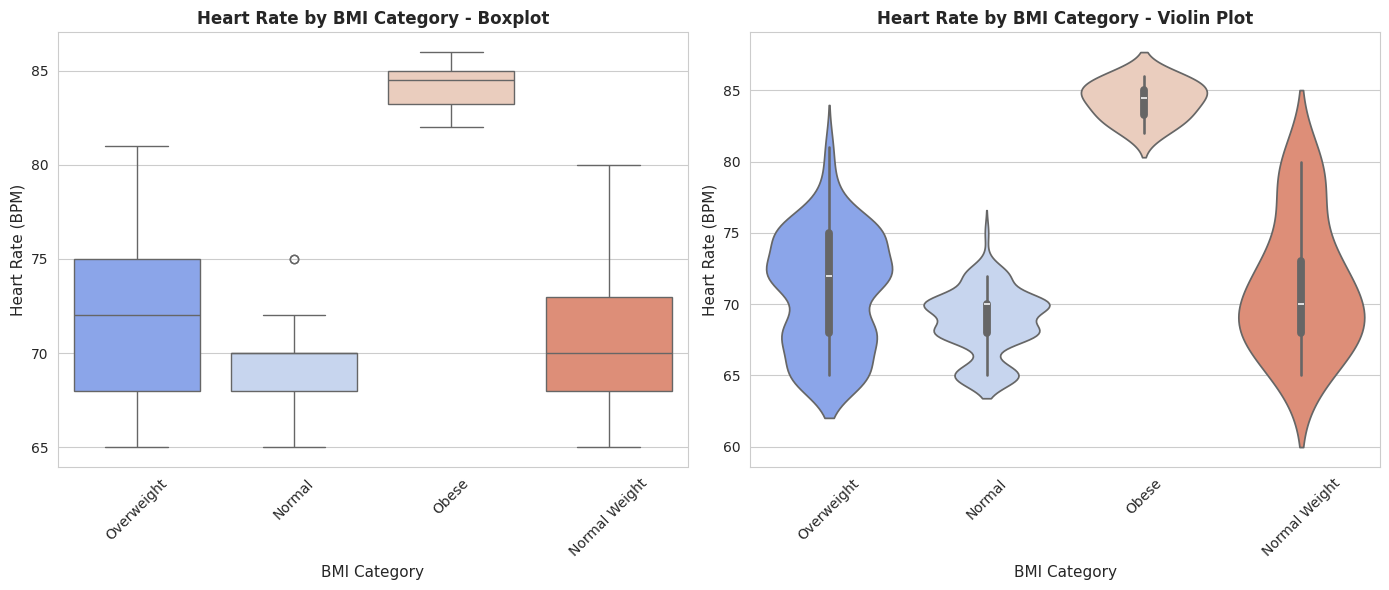


Heart Rate by BMI Category:
                    mean  median       std
BMI Category                              
Normal         68.728205    70.0  2.293643
Normal Weight  71.285714    70.0  4.616740
Obese          84.300000    84.5  1.337494
Overweight     70.945946    72.0  4.040246


In [35]:
# Plot 13: Heart Rate by BMI Category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=df_enhanced, x='BMI Category', y='Heart Rate', palette='coolwarm', ax=ax1)
ax1.set_title('Heart Rate by BMI Category - Boxplot', fontsize=12, fontweight='bold')
ax1.set_xlabel('BMI Category', fontsize=11)
ax1.set_ylabel('Heart Rate (BPM)', fontsize=11)
ax1.tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=df_enhanced, x='BMI Category', y='Heart Rate', palette='coolwarm', ax=ax2)
ax2.set_title('Heart Rate by BMI Category - Violin Plot', fontsize=12, fontweight='bold')
ax2.set_xlabel('BMI Category', fontsize=11)
ax2.set_ylabel('Heart Rate (BPM)', fontsize=11)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("\nHeart Rate by BMI Category:")
print(df_enhanced.groupby('BMI Category')['Heart Rate'].agg(['mean', 'median', 'std']))

---
## Step 13: Correlation Analysis
Understanding relationships between all numerical variables

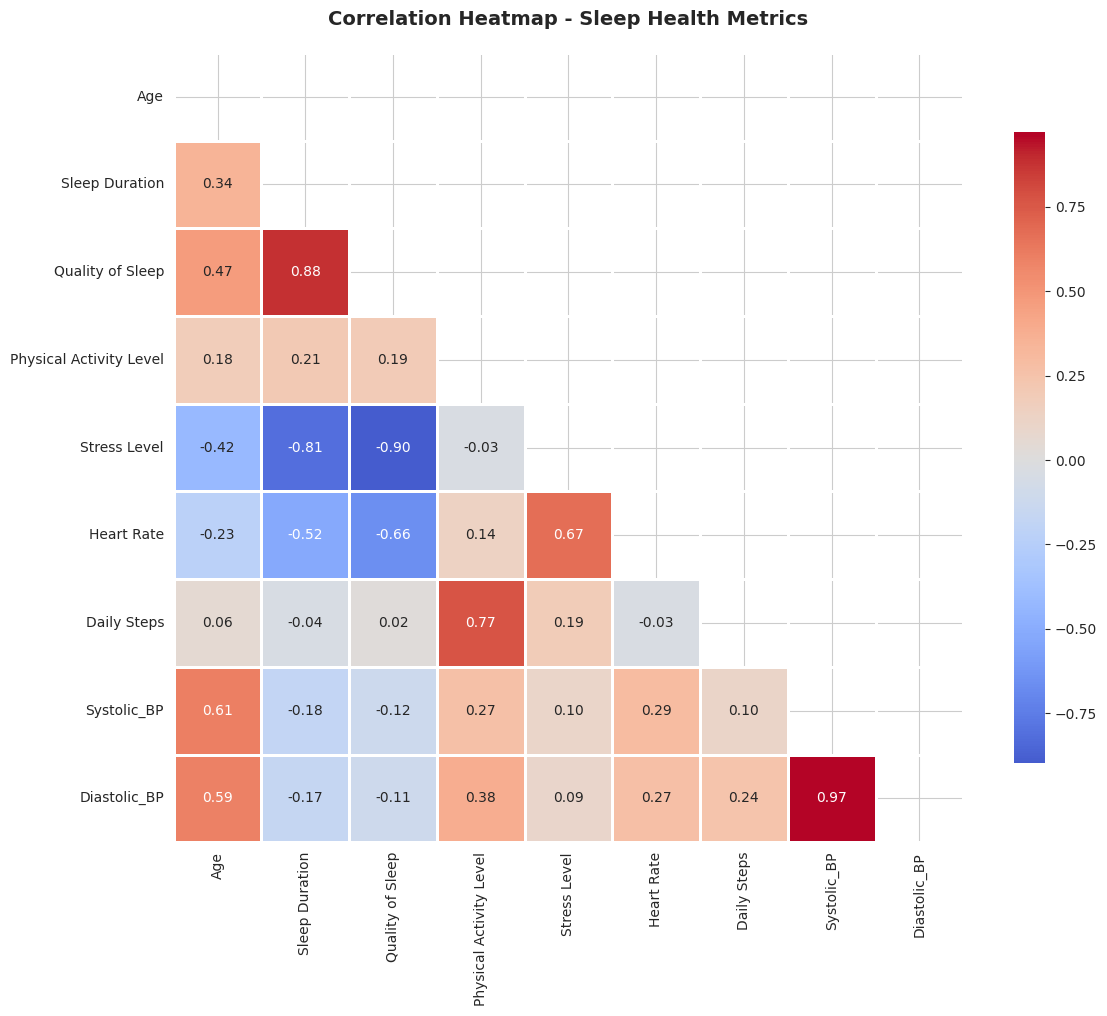

In [36]:
# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                 'Stress Level', 'Heart Rate', 'Daily Steps']

# Add blood pressure columns if available
if 'Systolic_BP' in df_enhanced.columns:
    numerical_cols.extend(['Systolic_BP', 'Diastolic_BP'])

# Calculate correlation matrix
correlation_matrix = df_enhanced[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Sleep Health Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [37]:
# Print strongest correlations with Sleep Quality
print("\nCorrelations with Quality of Sleep:")
print("=" * 60)
sleep_quality_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)
print(sleep_quality_corr)


Correlations with Quality of Sleep:
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Diastolic_BP              -0.110151
Systolic_BP               -0.121632
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


---
## Step 14: Age Group Analysis
Analyzing patterns across different age groups

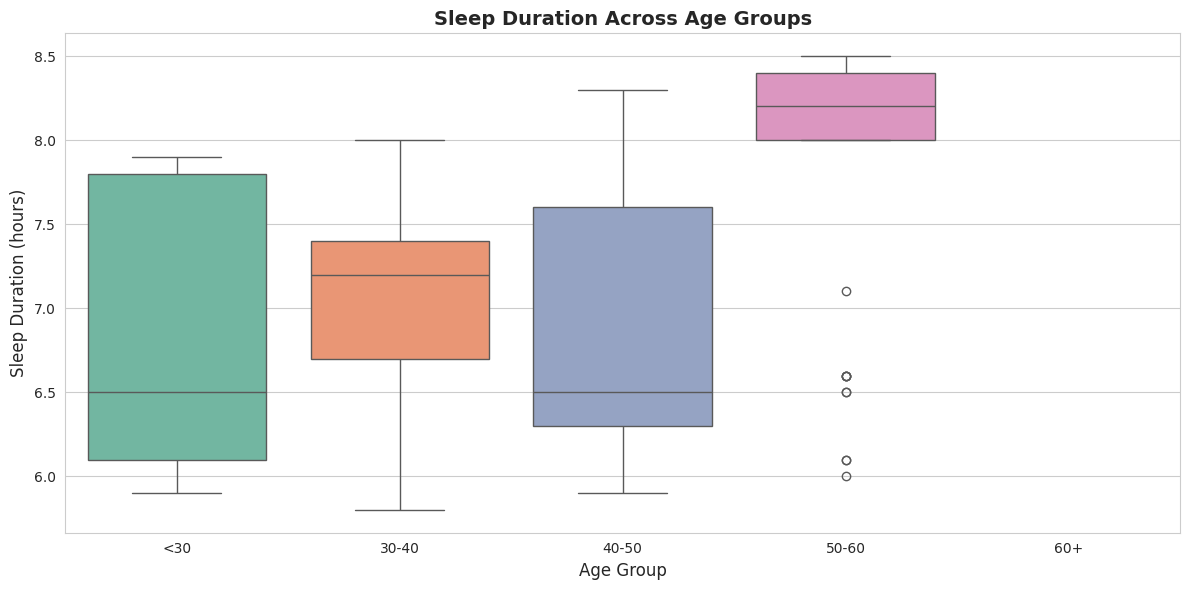


Sleep Duration by Age Group:
               mean  median       std  count
Age_Group                                   
<30        6.915625     6.5  0.846667     32
30-40      7.032331     7.2  0.593085    133
40-50      6.776692     6.5  0.658383    133
50-60      8.019737     8.2  0.640421     76
60+             NaN     NaN       NaN      0


In [38]:
# Plot 14: Sleep Duration by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_enhanced, x='Age_Group', y='Sleep Duration', palette='Set2')
plt.title('Sleep Duration Across Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.tight_layout()
plt.show()

# Print statistics
print("\nSleep Duration by Age Group:")
print(df_enhanced.groupby('Age_Group')['Sleep Duration'].agg(['mean', 'median', 'std', 'count']))

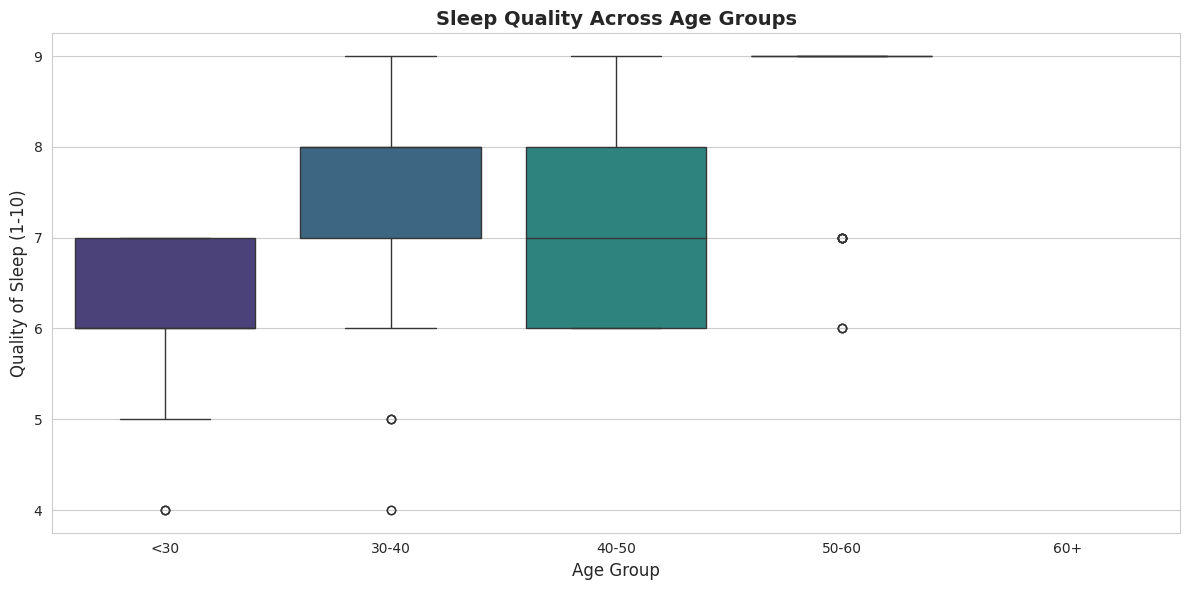


Sleep Quality by Age Group:
               mean  median       std
Age_Group                            
<30        6.156250     6.0  0.987319
30-40      7.300752     8.0  0.992281
40-50      6.812030     7.0  0.888908
50-60      8.697368     9.0  0.800329
60+             NaN     NaN       NaN


In [39]:
# Plot 15: Sleep Quality by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_enhanced, x='Age_Group', y='Quality of Sleep', palette='viridis')
plt.title('Sleep Quality Across Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Quality of Sleep (1-10)', fontsize=12)
plt.tight_layout()
plt.show()

print("\nSleep Quality by Age Group:")
print(df_enhanced.groupby('Age_Group')['Quality of Sleep'].agg(['mean', 'median', 'std']))

---
## Step 15: Key Findings and Statistics
Summarizing the main insights from our analysis

In [40]:
# Calculate key statistics
print("="*70)
print(" " * 20 + "KEY FINDINGS SUMMARY")
print("="*70)

# Dataset overview
print("\n📊 DATASET OVERVIEW:")
print(f"   Total Records: {len(df_enhanced)}")
print(f"   Total Features: {df_enhanced.shape[1]}")
print(f"   Male: {len(df_enhanced[df_enhanced['Gender']=='Male'])} ({len(df_enhanced[df_enhanced['Gender']=='Male'])/len(df_enhanced)*100:.1f}%)")
print(f"   Female: {len(df_enhanced[df_enhanced['Gender']=='Female'])} ({len(df_enhanced[df_enhanced['Gender']=='Female'])/len(df_enhanced)*100:.1f}%)")

# Sleep patterns
print("\n😴 SLEEP PATTERNS:")
avg_sleep = df_enhanced['Sleep Duration'].mean()
avg_quality = df_enhanced['Quality of Sleep'].mean()
adequate_sleep = df_enhanced[(df_enhanced['Sleep Duration'] >= 7) & (df_enhanced['Sleep Duration'] <= 9)]
adequate_pct = len(adequate_sleep) / len(df_enhanced) * 100

print(f"   Average Sleep Duration: {avg_sleep:.2f} hours")
print(f"   Average Sleep Quality: {avg_quality:.2f}/10")
print(f"   People with Adequate Sleep (7-9h): {len(adequate_sleep)} ({adequate_pct:.1f}%)")

# Sleep disorders
disorder_count = len(df_enhanced[df_enhanced['Sleep Disorder'] != 'None'])
disorder_pct = disorder_count / len(df_enhanced) * 100
print(f"   People with Sleep Disorders: {disorder_count} ({disorder_pct:.1f}%)")

# Most common disorder
disorders = df_enhanced[df_enhanced['Sleep Disorder'] != 'None']['Sleep Disorder'].value_counts()
if len(disorders) > 0:
    print(f"   Most Common Disorder: {disorders.index[0]} ({disorders.values[0]} cases)")

# Lifestyle factors
print("\n🏃 LIFESTYLE FACTORS:")
avg_activity = df_enhanced['Physical Activity Level'].mean()
avg_stress = df_enhanced['Stress Level'].mean()
avg_steps = df_enhanced['Daily Steps'].mean()

print(f"   Average Physical Activity: {avg_activity:.1f} minutes/day")
print(f"   Average Stress Level: {avg_stress:.2f}/10")
print(f"   Average Daily Steps: {avg_steps:.0f} steps")

# Health metrics
print("\n❤️ HEALTH METRICS:")
avg_hr = df_enhanced['Heart Rate'].mean()
print(f"   Average Heart Rate: {avg_hr:.1f} BPM")

if 'Systolic_BP' in df_enhanced.columns:
    avg_sys = df_enhanced['Systolic_BP'].mean()
    avg_dia = df_enhanced['Diastolic_BP'].mean()
    print(f"   Average Blood Pressure: {avg_sys:.0f}/{avg_dia:.0f} mmHg")

# BMI distribution
print("\n⚖️ BMI DISTRIBUTION:")
bmi_dist = df_enhanced['BMI Category'].value_counts()
for bmi, count in bmi_dist.items():
    pct = count / len(df_enhanced) * 100
    print(f"   {bmi}: {count} ({pct:.1f}%)")

# Key correlations
print("\n🔗 KEY CORRELATIONS:")
corr_duration_quality = df_enhanced[['Sleep Duration', 'Quality of Sleep']].corr().iloc[0, 1]
corr_stress_quality = df_enhanced[['Stress Level', 'Quality of Sleep']].corr().iloc[0, 1]
corr_activity_stress = df_enhanced[['Physical Activity Level', 'Stress Level']].corr().iloc[0, 1]

print(f"   Sleep Duration ↔ Sleep Quality: {corr_duration_quality:.3f}")
print(f"   Stress Level ↔ Sleep Quality: {corr_stress_quality:.3f}")
print(f"   Physical Activity ↔ Stress Level: {corr_activity_stress:.3f}")

print("\n" + "="*70)

                    KEY FINDINGS SUMMARY

📊 DATASET OVERVIEW:
   Total Records: 374
   Total Features: 21
   Male: 189 (50.5%)
   Female: 185 (49.5%)

😴 SLEEP PATTERNS:
   Average Sleep Duration: 7.13 hours
   Average Sleep Quality: 7.31/10
   People with Adequate Sleep (7-9h): 219 (58.6%)
   People with Sleep Disorders: 155 (41.4%)
   Most Common Disorder: Sleep Apnea (78 cases)

🏃 LIFESTYLE FACTORS:
   Average Physical Activity: 59.2 minutes/day
   Average Stress Level: 5.39/10
   Average Daily Steps: 6817 steps

❤️ HEALTH METRICS:
   Average Heart Rate: 70.2 BPM
   Average Blood Pressure: 129/85 mmHg

⚖️ BMI DISTRIBUTION:
   Normal: 195 (52.1%)
   Overweight: 148 (39.6%)
   Normal Weight: 21 (5.6%)
   Obese: 10 (2.7%)

🔗 KEY CORRELATIONS:
   Sleep Duration ↔ Sleep Quality: 0.883
   Stress Level ↔ Sleep Quality: -0.899
   Physical Activity ↔ Stress Level: -0.034



---
## Step 16: Save Processed Data
Saving our cleaned and enhanced dataset for future use

In [42]:
# Save the processed dataset
import os
if not os.path.exists('data'):
    os.makedirs('data')
df_enhanced.to_csv('data/sleep_health_processed.csv', index=False)
print("✓ Processed dataset saved: data/sleep_health_processed.csv")

# Save summary statistics
summary_stats = df_enhanced.describe()
summary_stats.to_csv('data/summary_statistics.csv')
print("✓ Summary statistics saved: data/summary_statistics.csv")

# Create team-specific datasets for group work
print("\nCreating team-specific datasets...")

# Person 1: Sleep Analysis
sleep_cols = ['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
              'Sleep Disorder', 'Age_Group', 'Sleep_Quality_Category']
person1_df = df_enhanced[[col for col in sleep_cols if col in df_enhanced.columns]]
person1_df.to_csv('data/person1_sleep_data.csv', index=False)
print("✓ Person 1 (Sleep Analysis) data saved: data/person1_sleep_data.csv")

# Person 2: Lifestyle Analysis
lifestyle_cols = ['Person ID', 'Age', 'Physical Activity Level', 'Stress Level',
                 'Daily Steps', 'Occupation', 'Activity_Category', 'Stress_Category']
person2_df = df_enhanced[[col for col in lifestyle_cols if col in df_enhanced.columns]]
person2_df.to_csv('data/person2_lifestyle_data.csv', index=False)
print("✓ Person 2 (Lifestyle Analysis) data saved: data/person2_lifestyle_data.csv")

# Person 3: Health Metrics Analysis
health_cols = ['Person ID', 'Age', 'BMI Category', 'Blood Pressure',
              'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'BMI_Numeric']
person3_df = df_enhanced[[col for col in health_cols if col in df_enhanced.columns]]
person3_df.to_csv('data/person3_health_data.csv', index=False)
print("✓ Person 3 (Health Metrics) data saved: data/person3_health_data.csv")

# Person 4: Full Dataset for Correlations
df_enhanced.to_csv('data/person4_full_data.csv', index=False)
print("✓ Person 4 (Correlations) data saved: data/person4_full_data.csv")

print("\n✓ All datasets saved successfully!")

✓ Processed dataset saved: data/sleep_health_processed.csv
✓ Summary statistics saved: data/summary_statistics.csv

Creating team-specific datasets...
✓ Person 1 (Sleep Analysis) data saved: data/person1_sleep_data.csv
✓ Person 2 (Lifestyle Analysis) data saved: data/person2_lifestyle_data.csv
✓ Person 3 (Health Metrics) data saved: data/person3_health_data.csv
✓ Person 4 (Correlations) data saved: data/person4_full_data.csv

✓ All datasets saved successfully!
